In [17]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [15]:
print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f"Train data: {X_train.shape}, {y_train.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")

Train data: (16512, 8), (16512,)
Test data: (4128, 8), (4128,)


In [9]:
print(y_train.head())

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64


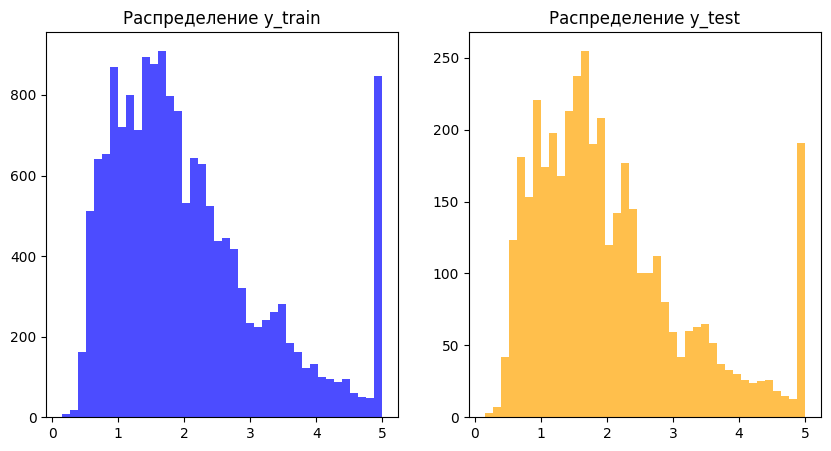

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=40, color='blue', alpha=0.7)
plt.title('Распределение y_train')

# Гистограмма целевой переменной в тестовой выборке
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=40, color='orange', alpha=0.7)
plt.title('Распределение y_test')

plt.show()

видно что распределения практически одинаковые

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 0.56
R^2 Score: 0.58


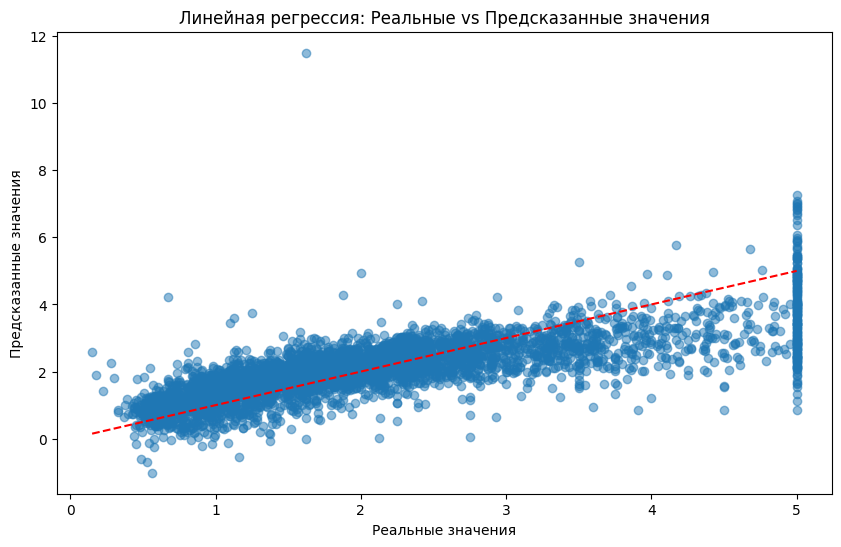

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Линия идеального предсказания
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия: Реальные vs Предсказанные значения')
plt.show()

In [22]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

print(coefficients)

# Свободный член (intercept)
print(f'Intercept: {model.intercept_}')

      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708
Intercept: -37.02327770606414


Давайте попробуем реализовать полиномиальные признаки и регуляризацию 

In [23]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

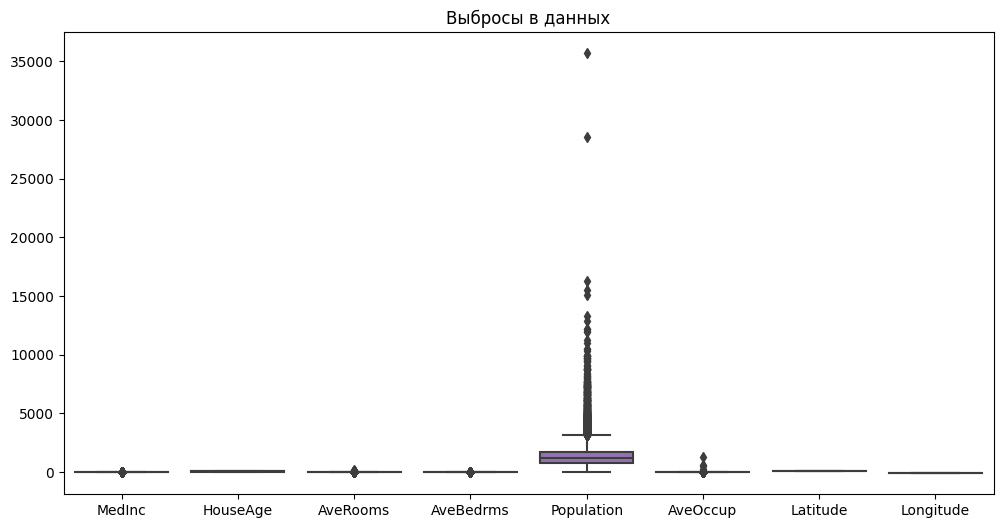

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.title('Выбросы в данных')
plt.show()

In [26]:
Q1 = X_train['Population'].quantile(0.25)
Q3 = X_train['Population'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['Population'] = X_train['Population'].clip(lower_bound, upper_bound)
X_test['Population'] = X_test['Population'].clip(lower_bound, upper_bound)

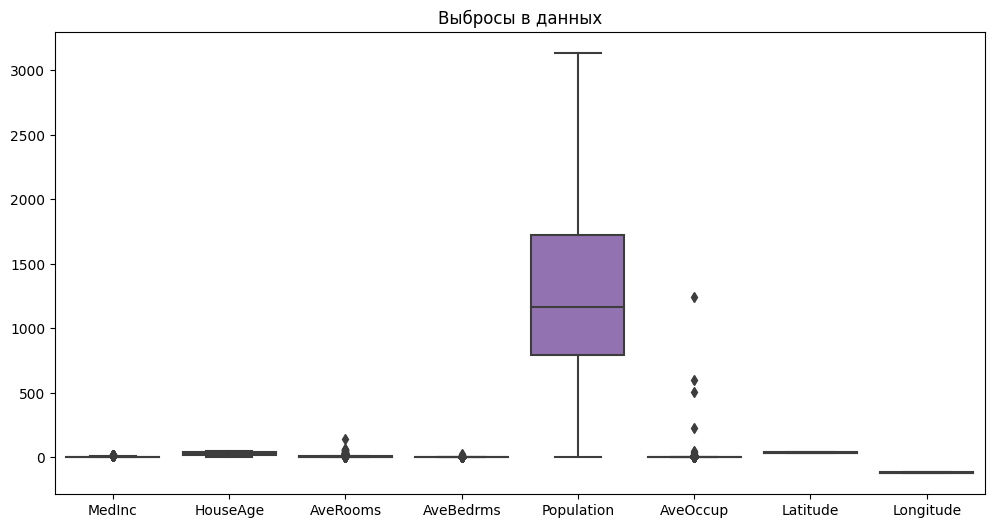

In [27]:
# Визуализация выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.title('Выбросы в данных')
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Создаем полиномиальные признаки (например, степени 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

Попробуем реализовать Ridge Regression (L2-регуляризация)

In [31]:
from sklearn.linear_model import Ridge

# Создаем и обучаем модель Ridge
model = Ridge(alpha=1.0)  # alpha — параметр регуляризации
model.fit(X_train_poly, y_train)
# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Ridge Regression:
MSE: 0.46
R^2: 0.65


Попробуем реализовать  Lasso Regression (L1-регуляризация)

In [ ]:
from sklearn.linear_model import Lasso

# Создаем и обучаем модель Lasso
model = Lasso(alpha=0.01)  # alpha — параметр регуляризации
model.fit(X_train_poly, y_train)

# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Lasso Regression:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Lasso Regression:
MSE: 0.61
R^2: 0.53


c:\Users\erik0\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+02, tolerance: 2.207e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


так как я подставлял случайные значения праметра альфа, попробуем использовать гридсеарч для поиска коэфициента

In [35]:
from sklearn.model_selection import GridSearchCV

# Задаем диапазон значений alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 50.0,  100.0]}

# Создаем модель Ridge
model = Ridge()

# Поиск по сетке
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Лучший параметр alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Лучший alpha для Ridge: {best_alpha}')

Лучший alpha для Ridge: 100.0


In [37]:
from sklearn.model_selection import GridSearchCV

# Задаем диапазон значений alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Создаем модель Lasso
model = Lasso()

# Поиск по сетке
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Лучший параметр alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Лучший alpha для Lasso: {best_alpha}')

c:\Users\erik0\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+03, tolerance: 1.755e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\erik0\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+03, tolerance: 1.779e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\erik0\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to i

Лучший alpha для Lasso: 0.1


Мы определили лучшие параметры для Ridge и Lasso regression: для  Ridge альфа = 100, для Lasso альфа = 0.1.
Сейчас я переделаю анализ данных уже с новыми параметрами альфа 

In [38]:
model = Ridge(alpha=100.0)  # alpha — параметр регуляризации
model.fit(X_train_poly, y_train)
# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Ridge Regression:
MSE: 0.45
R^2: 0.66


In [39]:
# Создаем и обучаем модель Lasso
model = Lasso(alpha=0.1)  # alpha — параметр регуляризации
model.fit(X_train_poly, y_train)

# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Lasso Regression:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Lasso Regression:
MSE: 0.68
R^2: 0.48


Ridge Regression:
MSE: 0.45
R^2: 0.66

это Данные которые мы получили сейчас, а вот данные со старым альфа 

Ridge Regression:
MSE: 0.46
R^2: 0.65

результаты практически не изменились, если не стали хуже 

-----------------------------

Lasso Regression:
MSE: 0.68
R^2: 0.48

это Данные которые мы получили сейчас, а вот данные со старым альфа 

Lasso Regression:
MSE: 0.61
R^2: 0.53

результаты изменились, метод наименьших квадратов показывает что мы отдалились от правильной логики и уменьшился r^2

In [8]:
print(X_train.head())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  


In [12]:
X_train_norm = scaler.fit_transform(X_train)
X_train.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,874.0,2.300000,36.78,-119.80


In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Создаем полиномиальные признаки (например, степени 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [40]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100.0)  # alpha — параметр регуляризации
model.fit(X_train_poly, y_train)
# Прогнозируем на тестовых данных
y_pred = model.predict(X_test_poly)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression:')
print(f'MSE: {mse:.2f}')
print(f'R^2: {r2:.2f}')

Ridge Regression:
MSE: 0.60
R^2: 0.54


c:\Users\erik0\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.97041e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Модель плохо анализируется методом линейной регрессии 